# Data Science salaries analysis

In this notebook we will be extracting metadata from raw product descriptions.

Note: This notebook is an adaptation of the concepts discussed in this [Kaggle notebook](https://www.kaggle.com/code/arnabchaki/eda-on-data-science-salaries). The same ideas/analysis have been by generating code from GPT3.5 API.

### Data Source

### Environment Setup
This notebook was run using Python 3.8 with following packages installed:
- langchain==0.0.177
- pandas==2.0.1
- opendatasets==0.1.22
- matplotlib==3.7
- wordcloud==1.9.2

## Load data

We'll be using the [Data Science Salaries 2023](https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023) dataset for this analysis.

Tried using the following prompt to generate this code, but open-ai but no response was found:
```
you are a python programmer. write most efficient code in terms of runtime. return just the code and no description.

read a dataset from kaggle into a pandas dataframe. the dataset has not been downloaded locally, we need to read directly from kaggle server
```

In [2]:
import opendatasets as od
from tempfile import mkdtemp
import pandas as pd

In [3]:
data_dir = mkdtemp()
od.download("https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023", data_dir=data_dir)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  aarshayjain


Your Kaggle Key:

  ········


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25.4k/25.4k [00:00<00:00, 12.0MB/s]

In [4]:
df = pd.read_csv(f"{data_dir}/data-science-salaries-2023/ds_salaries.csv")
df.shape

(3755, 11)

In [5]:
df.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S


## Understanding the output

### find number of missing values in each column

```
given a pandas dataframe df, write a code to find the number of missing values in all columns. 

write most efficient code in terms of runtime. return just the code and no description.
```

In [6]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

## drop unnecessary columns

```
you are a python programmer. write most efficient code in terms of runtime. return just the code and no description.

given a pandas dataframe df, do the following:
- drop salary and salary_currency columns
- rename salary_in_usd column to salary
```

In [7]:
df.drop(['salary', 'salary_currency'], axis=1, inplace=True)
df.rename(columns={'salary_in_usd': 'salary'}, inplace=True)

In [8]:
df.head(2)

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S


### Setup langchain

[API reference](https://python.langchain.com/en/latest/modules/models/chat/integrations/openai.html)

In [18]:
# load open ai api key
from dotenv import load_dotenv
load_dotenv("../.env")

True

In [19]:
from langchain.chat_models import ChatOpenAI
from langchain.prompts.chat import (SystemMessagePromptTemplate, 
                                    HumanMessagePromptTemplate, 
                                    ChatPromptTemplate)

In [24]:
template = """\
you are a python programmer. write most efficient code in terms of runtime. \
return just the code and no description.

given a pandas dataframe df, do the following:
{instructions}
"""
chat_prompt = ChatPromptTemplate.from_messages([
        SystemMessagePromptTemplate.from_template(""),
        HumanMessagePromptTemplate.from_template(template)])

In [23]:
chat = ChatOpenAI(temperature=0)

In [25]:
def get_code(instructions):
    response = chat(chat_prompt.format_prompt(instructions=instructions).to_messages())
    return response.content

## Handling categorical variables

Taking up a couple of features from the [base analysis](https://www.kaggle.com/code/arnabchaki/eda-on-data-science-salaries) as an example here.

### Experience Level

In [29]:
code = get_code("print unique value counts of experience_level column")
print(code)

df['experience_level'].value_counts()


In [35]:
df['experience_level'].value_counts()

experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64

In [33]:
code = get_code("""\
return a df with values replaced in experience_level column using following mapping:
- EN: Entry-level / Junior
- MI: Mid-level / Intermediate
- SE: Senior-level / Expert
- EX: Executive-level / Director.
""")
print(code)

df['experience_level'] = df['experience_level'].map({'EN': 'Entry-level / Junior', 'MI': 'Mid-level / Intermediate', 'SE': 'Senior-level / Expert', 'EX': 'Executive-level / Director'})


In [36]:
df['experience_level'] = df['experience_level'].map({
    'EN': 'Entry-level / Junior', 
    'MI': 'Mid-level / Intermediate', 
    'SE': 'Senior-level / Expert', 
    'EX': 'Executive-level / Director'})

In [37]:
df['experience_level'].value_counts()

experience_level
Senior-level / Expert         2516
Mid-level / Intermediate       805
Entry-level / Junior           320
Executive-level / Director     114
Name: count, dtype: int64

### Job Title

In [40]:
code = get_code("- how many distinct kinds of job_title are there?")
print(code)

len(df['job_title'].unique())


In [41]:
eval(code)

93

In [48]:
code = get_code("""\
- get top 15 most frequently occuring job_title
- make a bar chart of these titles along with count
- rotate labels of bar chart 90 degrees
- print the count on top of each bar
""")
print(code)

```
import matplotlib.pyplot as plt

top_jobs = df['job_title'].value_counts().nlargest(15)
plt.bar(top_jobs.index, top_jobs.values)
plt.xticks(rotation=90)
for i, v in enumerate(top_jobs.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()
```


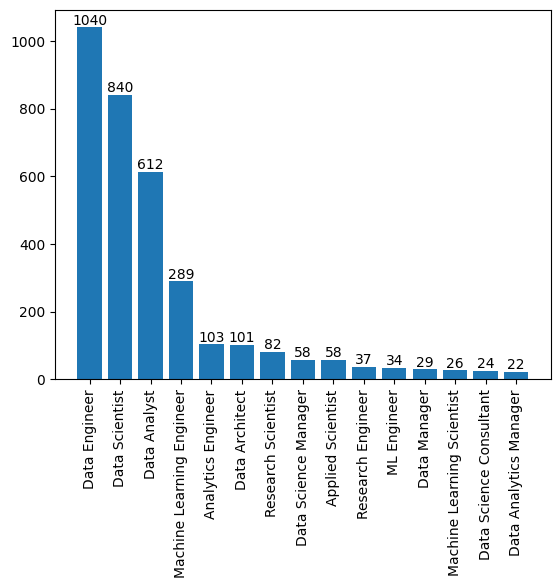

In [50]:
import matplotlib.pyplot as plt

top_jobs = df['job_title'].value_counts().nlargest(15)
plt.bar(top_jobs.index, top_jobs.values)
plt.xticks(rotation=90)
for i, v in enumerate(top_jobs.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

In [51]:
code = get_code("""\
- make a word cloud of job title using frequency of occurence of the job title as size of word
- main words should appear horizontal
""")
print(code)

Retrying langchain.chat_models.openai.ChatOpenAI.completion_with_retry.<locals>._completion_with_retry in 1.0 seconds as it raised Timeout: Request timed out: HTTPSConnectionPool(host='api.openai.com', port=443): Read timed out. (read timeout=600).


```python
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=200, max_font_size=100, min_font_size=10).generate_from_frequencies(df['job_title'].value_counts())

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
```


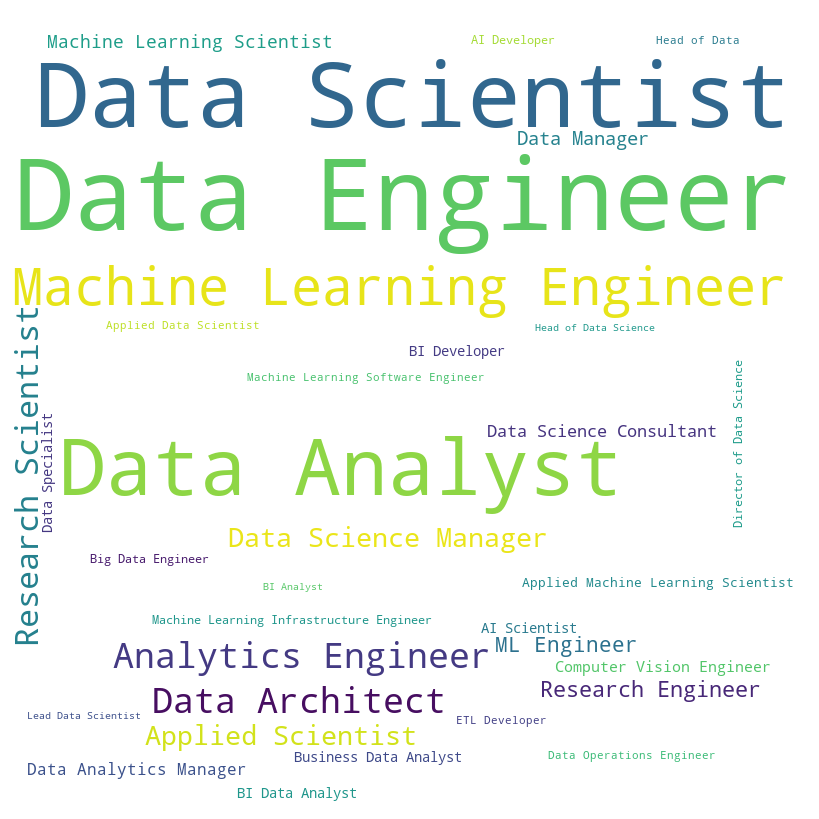

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=200, max_font_size=100, min_font_size=10).generate_from_frequencies(df['job_title'].value_counts())

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Handling Numerical Data

In [56]:
code = get_code("""
- make a pie chart showing distribution of work year
- add legend with percentage of values in each pie
""")
print(code)

import matplotlib.pyplot as plt

plt.pie(df['work_year'].value_counts(), labels=df['work_year'].unique(), autopct='%1.1f%%')
plt.legend()
plt.show()


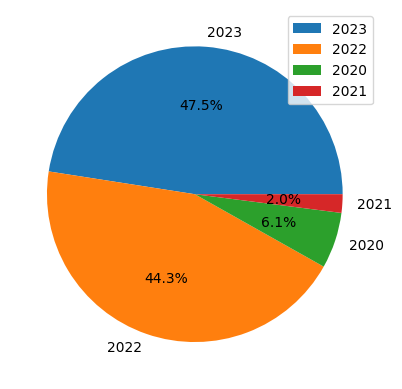

In [58]:
import matplotlib.pyplot as plt

plt.pie(df['work_year'].value_counts(), labels=df['work_year'].unique(), autopct='%1.1f%%')
plt.legend()
plt.show()

In [59]:
code = get_code("make a boxplot of the salary")
print(code)

import matplotlib.pyplot as plt
df.boxplot(column='salary')
plt.show()


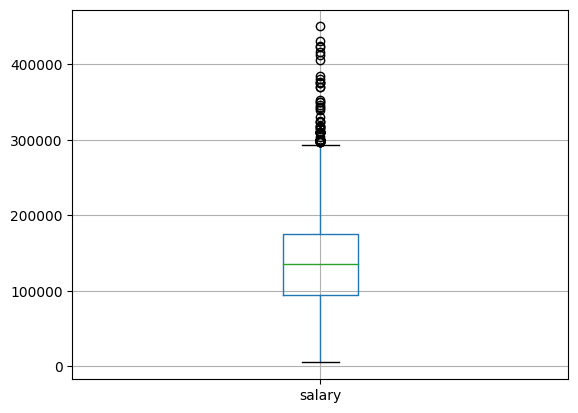

In [60]:
import matplotlib.pyplot as plt
df.boxplot(column='salary')
plt.show()

In [62]:
code = get_code("""return a df with values replaced in remote_ratio column using following mapping:
- 0: No Remote Work
- 50: Partially Remote
- 100: Fully Remote
""",)
print(code)

df['remote_ratio'] = df['remote_ratio'].map({0: 'No Remote Work', 50: 'Partially Remote', 100: 'Fully Remote'})


In [63]:
df['remote_ratio'] = df['remote_ratio'].map({0: 'No Remote Work', 50: 'Partially Remote', 100: 'Fully Remote'})

In [64]:
code = get_code("print unique value counts of remote ratio")
print(code)

df['remote_ratio'].value_counts()


In [65]:
df['remote_ratio'].value_counts()

remote_ratio
No Remote Work      1923
Fully Remote        1643
Partially Remote     189
Name: count, dtype: int64

## Remote work by work year

In [68]:
code = get_code(
    "make a bar chart of percentage counts of remote_ratio grouped by work_year.")
print(code)

df.groupby('work_year')['remote_ratio'].value_counts(normalize=True).mul(100).unstack().plot(kind='bar')


<Axes: xlabel='work_year'>

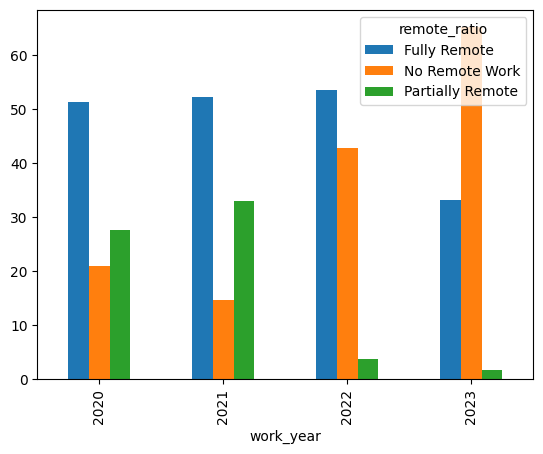

In [69]:
df.groupby('work_year')['remote_ratio'].value_counts(normalize=True).mul(100).unstack().plot(kind='bar')

## Experience Level Analysis

In [70]:
code = get_code("""
- make a grid of charts, one for each employment_type
- each chart should have a bar plot with the counts of experience_level
- rotate labels of all charts by 45 degress
- all plots should in a single row
""")
print(code)

```python
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, len(df['employment_type'].unique()), figsize=(20,5))

for i, emp_type in enumerate(df['employment_type'].unique()):
    emp_df = df[df['employment_type'] == emp_type]
    axs[i].bar(emp_df['experience_level'].value_counts().index, emp_df['experience_level'].value_counts().values)
    axs[i].set_xticklabels(emp_df['experience_level'].value_counts().index, rotation=45)
    axs[i].set_title(emp_type)
    
plt.show()
```


/var/folders/rj/4_r942cx5xv13l6l57n5wz3m0000gn/T/ipykernel_16233/3599805102.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(emp_df['experience_level'].value_counts().index, rotation=45)
/var/folders/rj/4_r942cx5xv13l6l57n5wz3m0000gn/T/ipykernel_16233/3599805102.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(emp_df['experience_level'].value_counts().index, rotation=45)
/var/folders/rj/4_r942cx5xv13l6l57n5wz3m0000gn/T/ipykernel_16233/3599805102.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(emp_df['experience_level'].value_counts().index, rotation=45)
/var/folders/rj/4_r942cx5xv13l6l57n5wz3m0000gn/T/ipykernel_16233/3599805102.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(emp_df['experience_level'].value_counts().index, rotation=45)


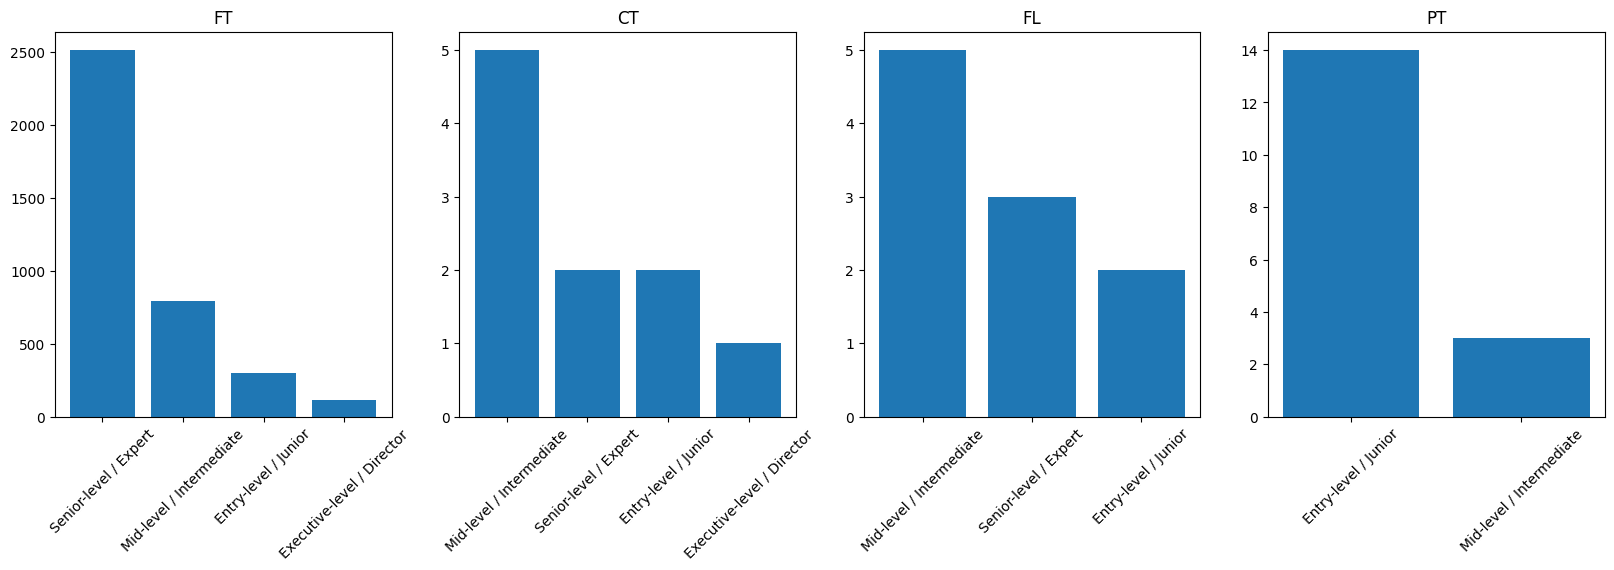

In [71]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, len(df['employment_type'].unique()), figsize=(20,5))

for i, emp_type in enumerate(df['employment_type'].unique()):
    emp_df = df[df['employment_type'] == emp_type]
    axs[i].bar(emp_df['experience_level'].value_counts().index, emp_df['experience_level'].value_counts().values)
    axs[i].set_xticklabels(emp_df['experience_level'].value_counts().index, rotation=45)
    axs[i].set_title(emp_type)
    
plt.show()

In [74]:
code = get_code("""
- plot the distribution of salary, grouped by work_year
- use lines to represent distribution
""")
print(code)

```python
import seaborn as sns
sns.displot(df, x="salary", hue="work_year", kind="kde")
```


In [73]:
import seaborn as sns
sns.displot(df, x="salary", hue="work_year", kind="kde")

ModuleNotFoundError: No module named 'seaborn'